# Data processing


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.spatial import cKDTree
import numpy as np

In [4]:

# Specify the path to your CSV files
weather_csv_path = "/Users/computer/Downloads/Load/Load/data/weather_data/*.csv"

# Get all CSV file paths
weather_csv_files = glob.glob(weather_csv_path)

# Read and combine all files into one DataFrame
weather_df = [pd.read_csv(file, parse_dates=['date_time']) for file in weather_csv_files]

# Merge dataframes of all processed files
weather_df = pd.concat(weather_df, ignore_index=True)

# Display the combined DataFrame
print(weather_df)


         id                              name source        lon        lat  \
0        24  Queen Alia International Airport    JMD  36.019444  31.727222   
1        24  Queen Alia International Airport    JMD  36.019444  31.727222   
2        24  Queen Alia International Airport    JMD  36.019444  31.727222   
3        24  Queen Alia International Airport    JMD  36.019444  31.727222   
4        24  Queen Alia International Airport    JMD  36.019444  31.727222   
...      ..                               ...    ...        ...        ...   
8467900  29                       Ras Muneeef    JMD  35.811667  32.380278   
8467901  29                       Ras Muneeef    JMD  35.811667  32.380278   
8467902  29                       Ras Muneeef    JMD  35.811667  32.380278   
8467903  29                       Ras Muneeef    JMD  35.811667  32.380278   
8467904  29                       Ras Muneeef    JMD  35.811667  32.380278   

            alt     id.1           date_time  horizontal_visibi

In [5]:
import glob
import pandas as pd

# Define the directory containing all Excel files
consumption_dir = "/Users/computer/Downloads/Load/Load/data/consumption_data_xlxs/*.xlsx"

# Get all .xlsx file paths in the directory
file_paths = glob.glob(consumption_dir)

# Read and clean each file
dfs = []
for file in file_paths:
    df = pd.read_excel(file, skiprows=2)  # Skip first 2 rows
    df.columns = df.iloc[0]  # Set third row as header
    df = df[1:].reset_index(drop=True)  # Drop the fourth row (which is now at index 0)
    dfs.append(df)

# Combine all cleaned files
combined_consumption_df = pd.concat(dfs, ignore_index=True)

# Drop completely empty columns
combined_consumption_df = combined_consumption_df.dropna(axis=1, how='all')

# Display the first few rows
print(combined_consumption_df.head())


0        NaT                 NaT  NaN                 NaT   ABDOON_P   MW  \
0        NaT                 NaT  NaN                 NaT      VALUE  NaN   
1 2024-01-01 2024-01-01 00:00:00    - 2024-01-01 00:15:00  80.717635        
2        NaT 2024-01-01 00:15:00    - 2024-01-01 00:30:00  80.717635        
3        NaT 2024-01-01 00:30:00    - 2024-01-01 00:45:00  80.717635        
4        NaT 2024-01-01 00:45:00    - 2024-01-01 01:00:00  80.717635        

0  ALHIZAM_P   MW    ALSALT_P   MW  ...   MW    ABDALI_P    AMMANS_P  \
0      VALUE  NaN       VALUE  NaN  ...  NaN         NaN         NaN   
1  83.852805       117.611849       ...       110.180373  170.687547   
2  83.852805       117.611849       ...       110.180373  170.687547   
3  83.852805       117.611849       ...       110.180373  170.687547   
4  83.852805       117.611849       ...       110.180373  170.687547   

0 AQABA A2_P AQABA_TH_P   BAYADER_P  GHORSAF_P     MAAN_P  Q.A.I.A_P  \
0        NaN        NaN         

In [6]:
combined_consumption_df.head()

,NaT,NaT,NaN,NaT,ABDOON_P,MW,ALHIZAM_P,MW,ALSALT_P,MW,...,MW,ABDALI_P,AMMANS_P,AQABA A2_P,AQABA_TH_P,BAYADER_P,GHORSAF_P,MAAN_P,Q.A.I.A_P,ZERQA_P
0,NaT,NaT,NaN,NaT,VALUE,NaN,VALUE,NaN,VALUE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01,2024-01-01 00:00:00,-,2024-01-01 00:15:00,80.717635,,83.852805,,117.611849,,...,,110.180373,170.687547,27.385097,21.642372,143.835519,20.475087,46.814844,65.315162,86.534612
2,NaT,2024-01-01 00:15:00,-,2024-01-01 00:30:00,80.717635,,83.852805,,117.611849,,...,,110.180373,170.687547,27.385097,21.642372,143.835519,20.475087,46.814844,65.315162,86.534612
3,NaT,2024-01-01 00:30:00,-,2024-01-01 00:45:00,80.717635,,83.852805,,117.611849,,...,,110.180373,170.687547,27.385097,21.642372,143.835519,20.475087,46.814844,65.315162,86.534612
4,NaT,2024-01-01 00:45:00,-,2024-01-01 01:00:00,80.717635,,83.852805,,117.611849,,...,,110.180373,170.687547,27.385097,21.642372,143.835519,20.475087,46.814844,65.315162,86.534612


In [7]:
weather_df.head()

,id,name,source,lon,lat,alt,id.1,date_time,horizontal_visibility_km,cloud_cover_oktas,wind_speed_knot,wind_direction_degree,irradiance,relative_humidity_percent,air_temperature_c,rainfall_mm,weather_source_id,pressure_mbar,air_density_c,module_temp_c
0,24,Queen Alia International Airport,JMD,36.019444,31.727222,722.0,4381376,2021-05-25 00:00:00,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN
1,24,Queen Alia International Airport,JMD,36.019444,31.727222,722.0,4381377,2021-05-25 03:00:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN
2,24,Queen Alia International Airport,JMD,36.019444,31.727222,722.0,4381378,2021-05-25 06:00:00,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN
3,24,Queen Alia International Airport,JMD,36.019444,31.727222,722.0,4385595,2021-06-11 09:00:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN
4,24,Queen Alia International Airport,JMD,36.019444,31.727222,722.0,4381382,2021-05-25 18:00:00,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN


## Verifying data types of all columns

In [9]:
print(combined_consumption_df.dtypes)
print(weather_df.dtypes)

0
NaT          datetime64[ns]
NaT          datetime64[ns]
NaN                  object
NaT          datetime64[ns]
ABDOON_P             object
                  ...      
BAYADER_P            object
GHORSAF_P            object
MAAN_P               object
Q.A.I.A_P            object
ZERQA_P              object
Length: 103, dtype: object
id                                    int64
name                                 object
source                               object
lon                                 float64
lat                                 float64
alt                                 float64
id.1                                  int64
date_time                    datetime64[ns]
horizontal_visibility_km            float64
cloud_cover_oktas                   float64
wind_speed_knot                     float64
wind_direction_degree               float64
irradiance                          float64
relative_humidity_percent           float64
air_temperature_c                   float64
rai

In [10]:
# Select all columns except 'id'
nan_per_w_station = weather_df.groupby('id').apply(lambda group: group.loc[:, group.columns != 'id'].isna().sum() / len(group))
nan_per_w_station 

/var/folders/np/t7_6mjq16kn5ymsvjbw3kjd40000gn/T/ipykernel_33051/2398438414.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_per_w_station = weather_df.groupby('id').apply(lambda group: group.loc[:, group.columns != 'id'].isna().sum() / len(group))


,name,source,lon,lat,alt,id.1,date_time,horizontal_visibility_km,cloud_cover_oktas,wind_speed_knot,wind_direction_degree,irradiance,relative_humidity_percent,air_temperature_c,rainfall_mm,weather_source_id,pressure_mbar,air_density_c,module_temp_c
id,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.594841,0.745370,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.918429,0.958836,0.056672,0.056672,0.056672,0.056672,0.056672,0.056672,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.984803,0.992522,0.005157,0.005157,0.005157,0.005157,0.005157,0.005157,0.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971305,0.984991,0.002268,0.002268,0.002268,0.002268,0.002268,0.002268,0.0,1.0,1.0,1.0


## Selecting weather rich columns as features

In [12]:
# Filter out unnecessary weather features while keeping identifiers
weather_features = [
    # identifiers
    'id',
    'name',
    # features
    'lon',
    'lat',
    'alt',
    'date_time',
    'wind_speed_knot',
    'wind_direction_degree',
    'irradiance',
    'relative_humidity_percent',
    'air_temperature_c',
    'rainfall_mm',
]

weather_df = weather_df[weather_features]
weather_df.head()

,id,name,lon,lat,alt,date_time,wind_speed_knot,wind_direction_degree,irradiance,relative_humidity_percent,air_temperature_c,rainfall_mm
0,24,Queen Alia International Airport,36.019444,31.727222,722.0,2021-05-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,24,Queen Alia International Airport,36.019444,31.727222,722.0,2021-05-25 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,24,Queen Alia International Airport,36.019444,31.727222,722.0,2021-05-25 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,24,Queen Alia International Airport,36.019444,31.727222,722.0,2021-06-11 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Queen Alia International Airport,36.019444,31.727222,722.0,2021-05-25 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN


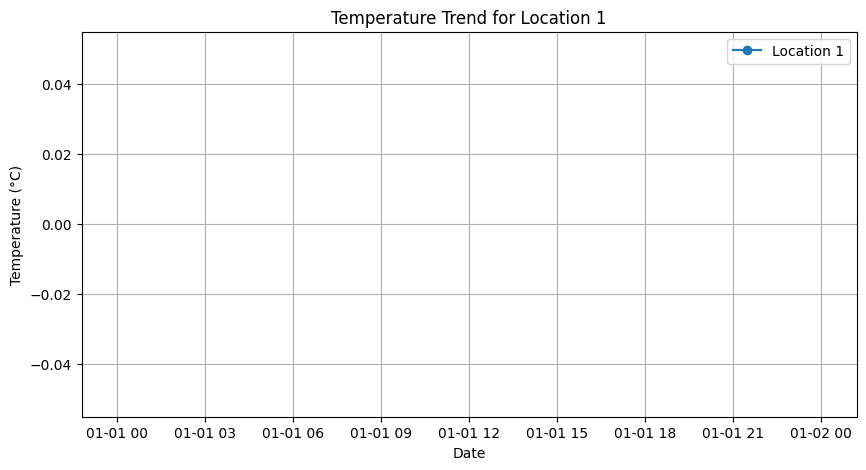

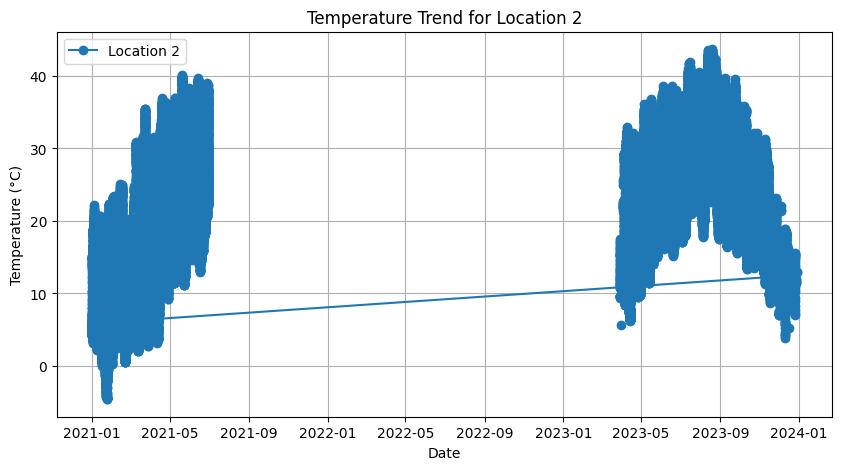

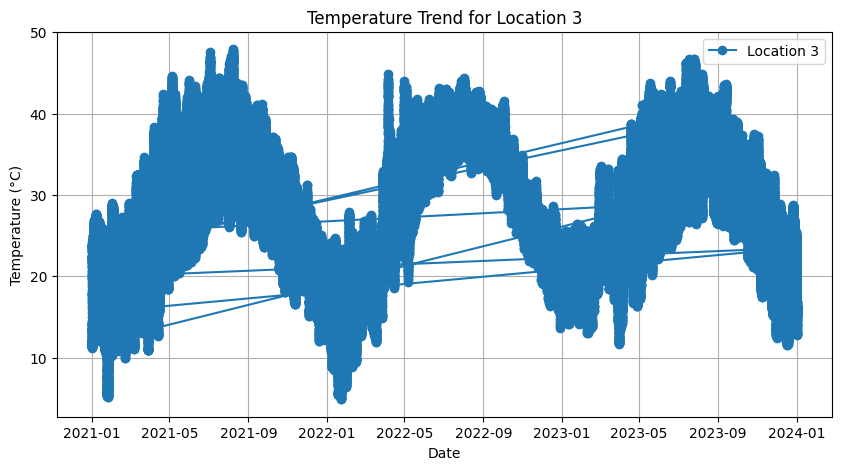

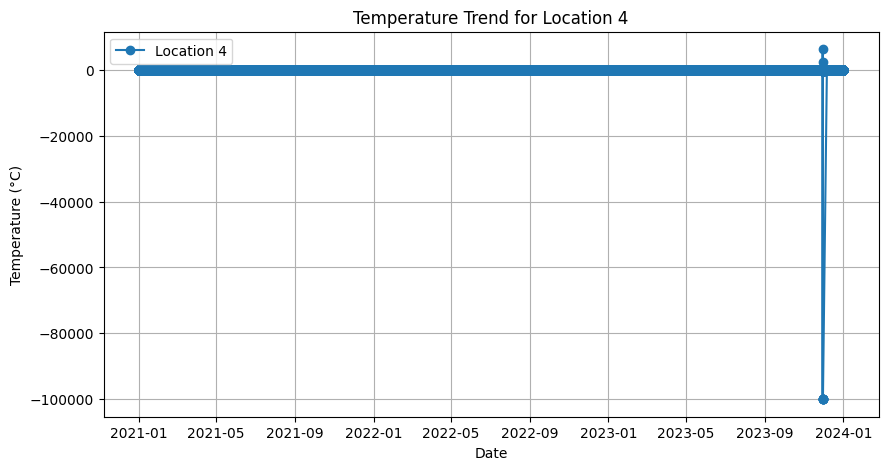

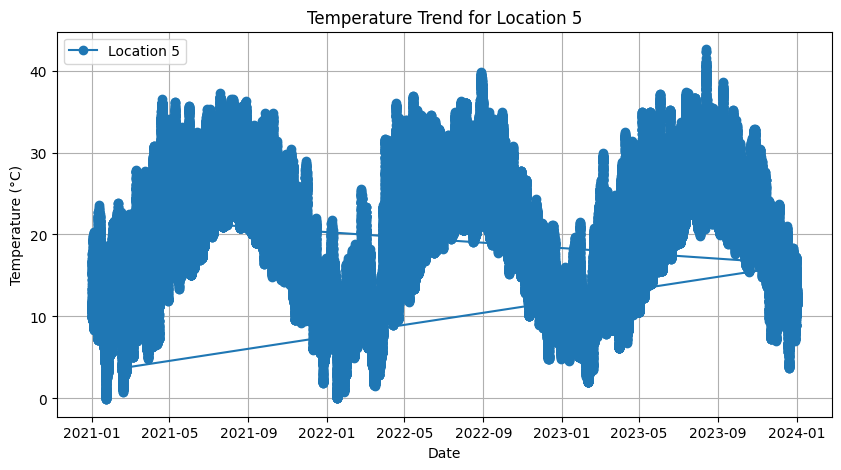

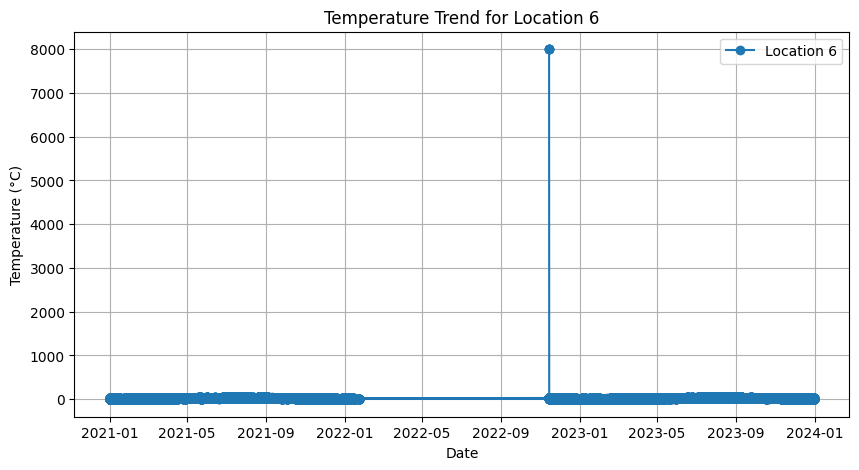

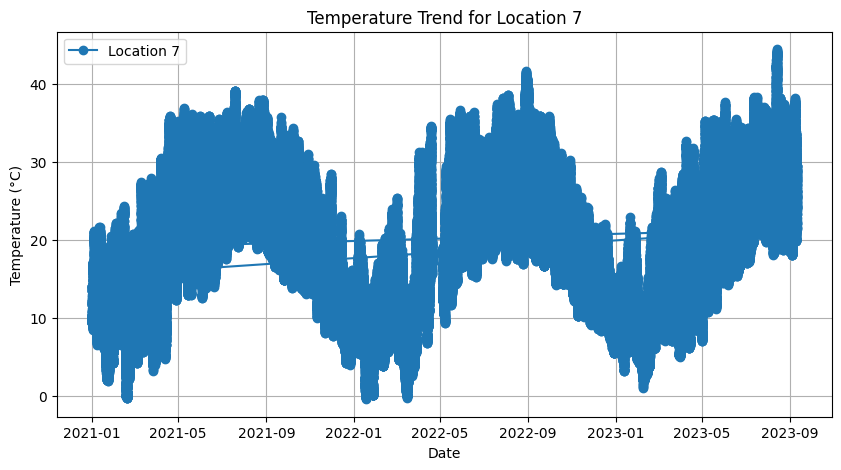

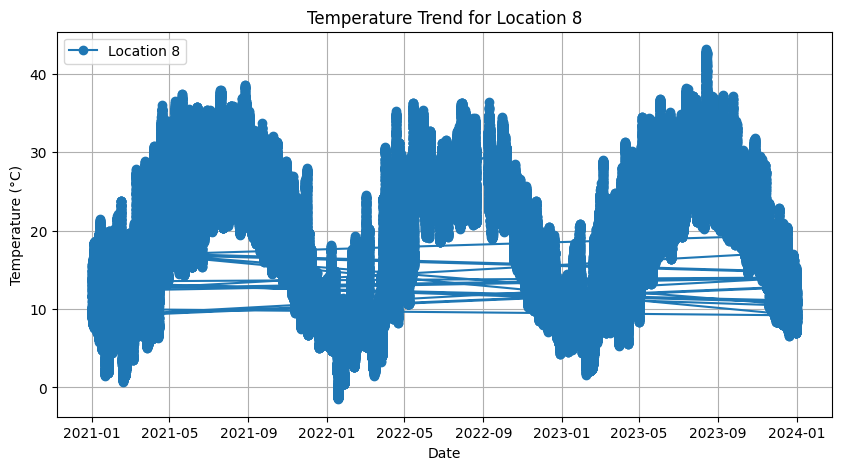

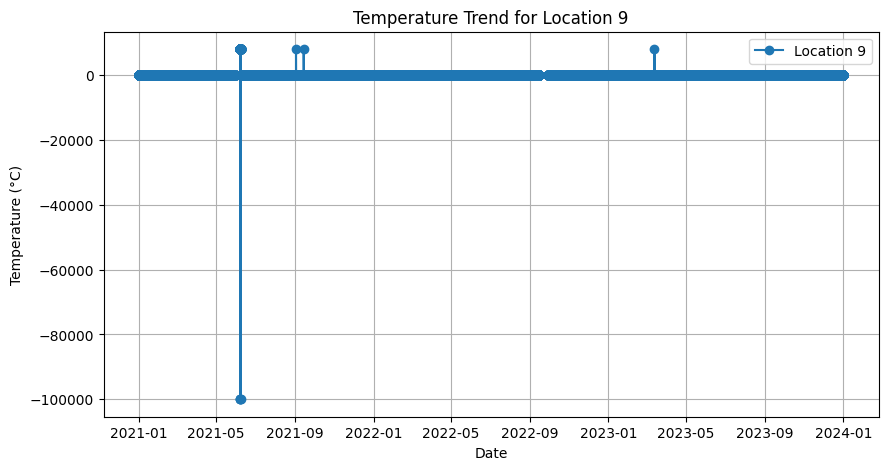

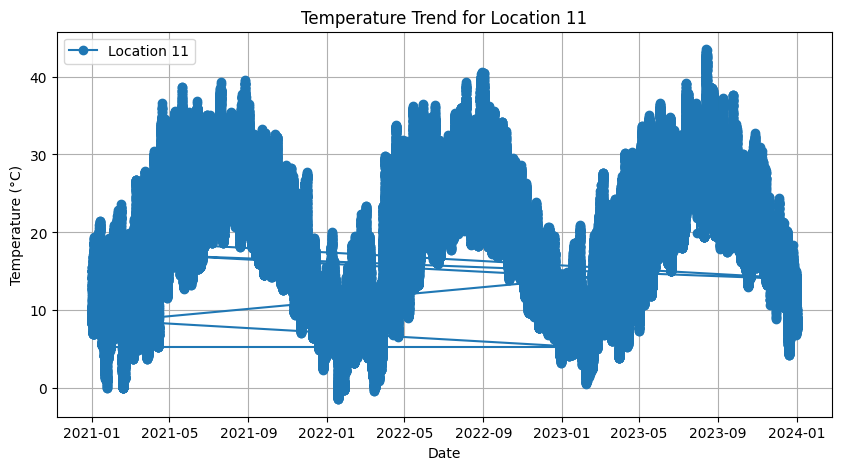

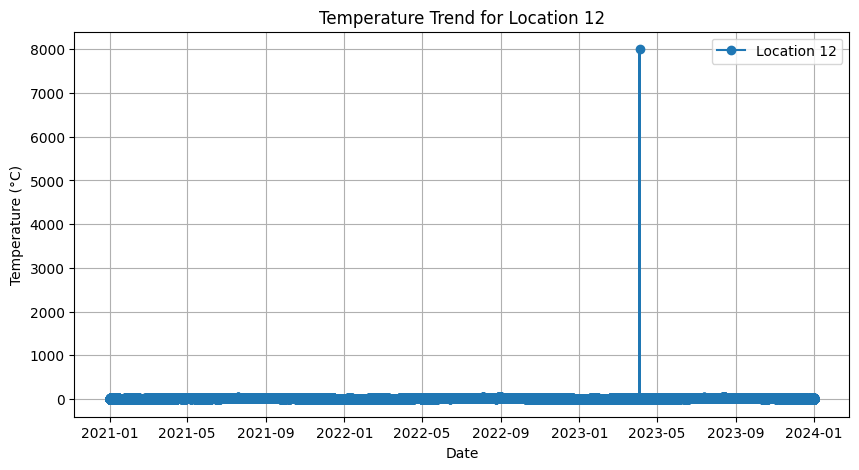

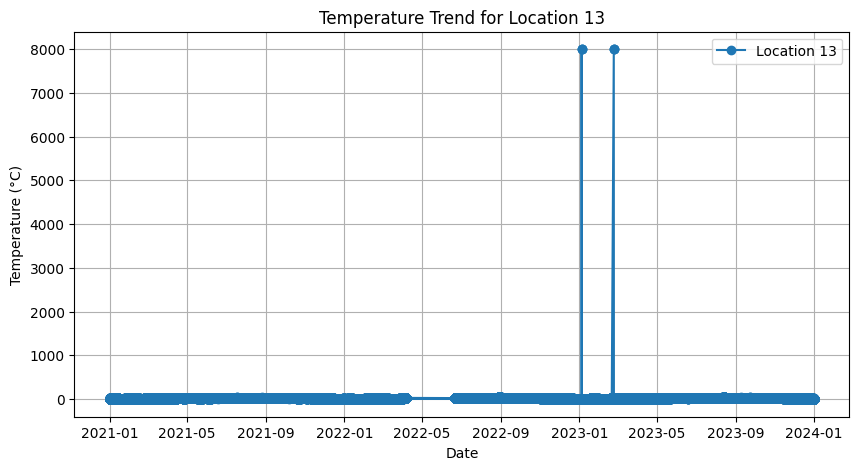

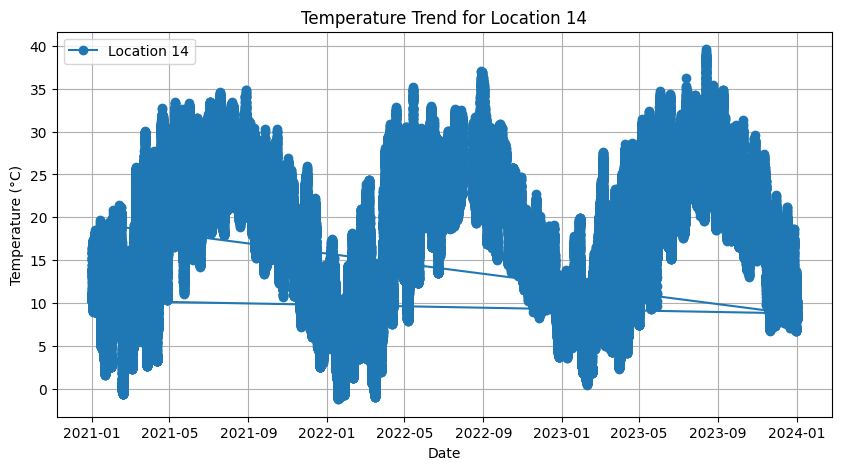

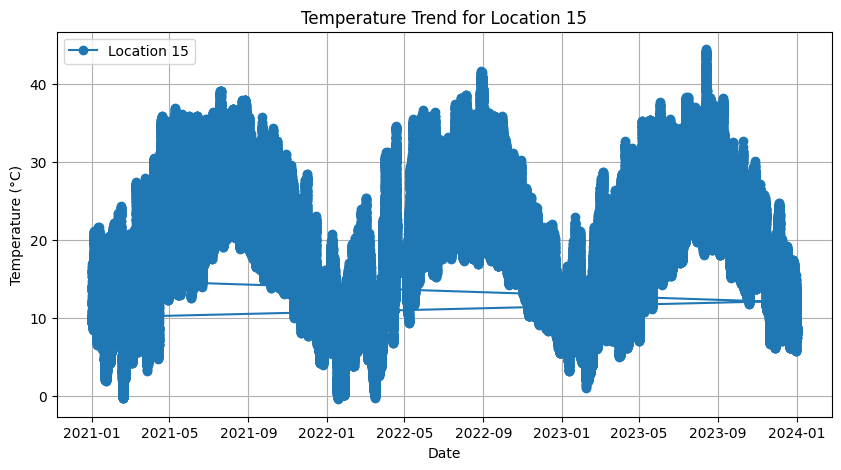

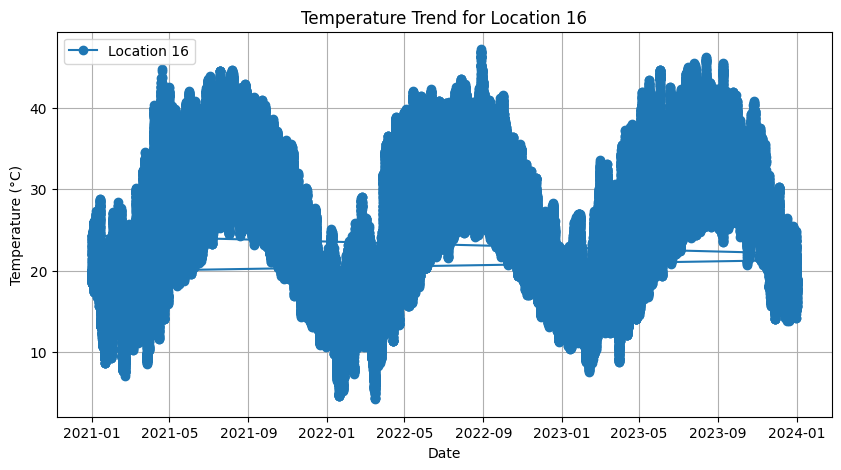

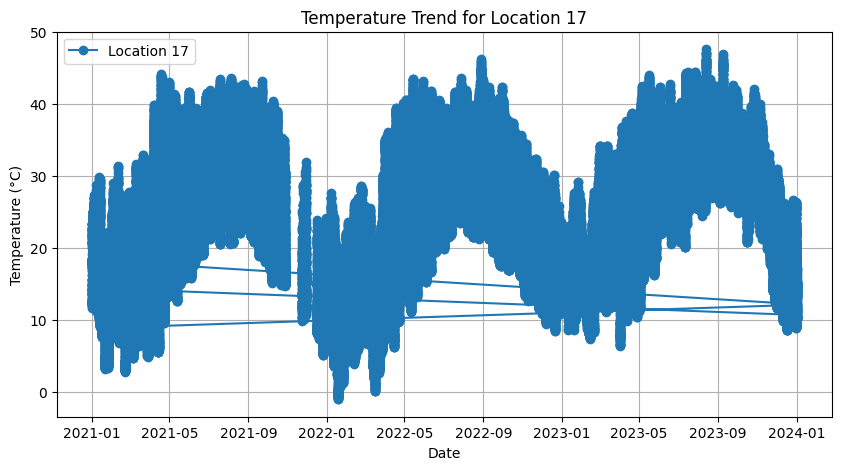

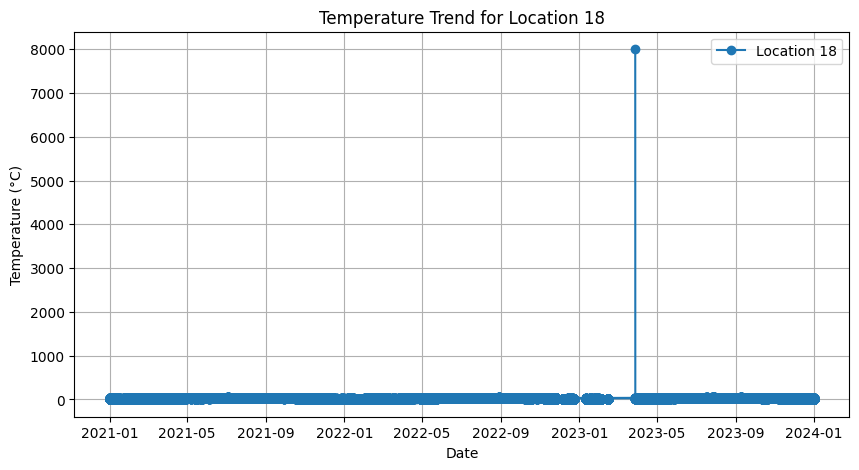

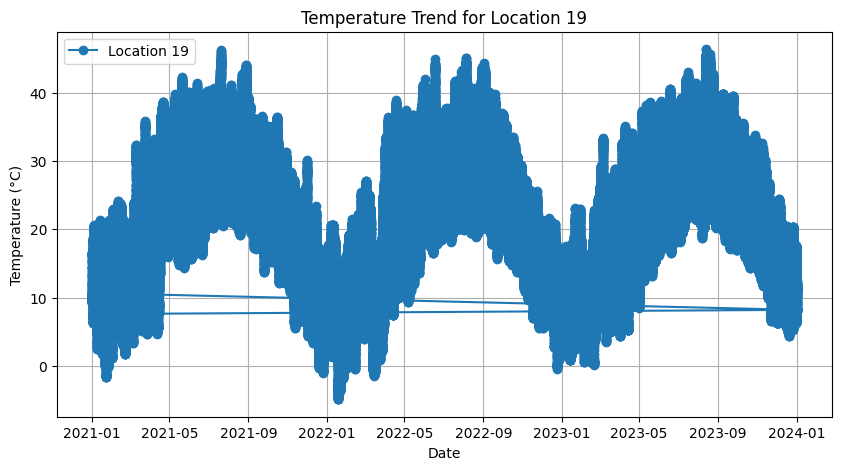

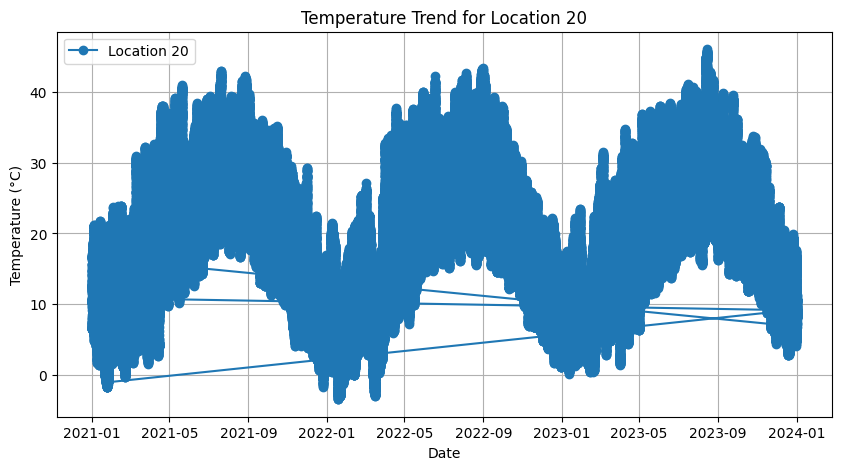

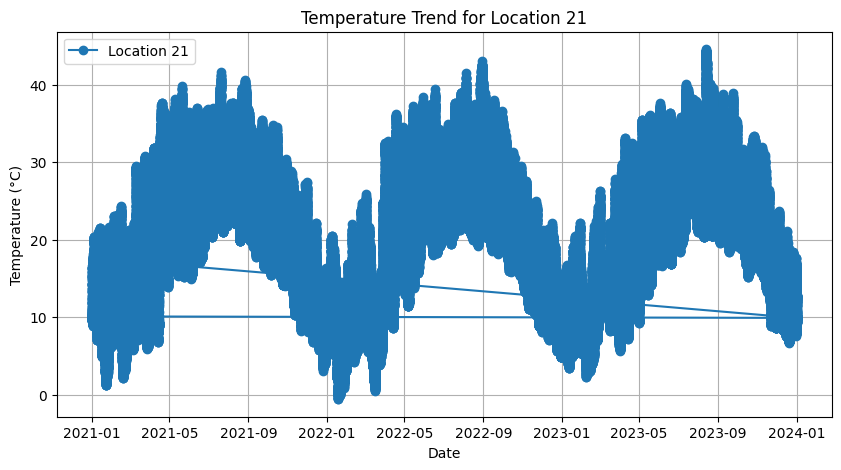

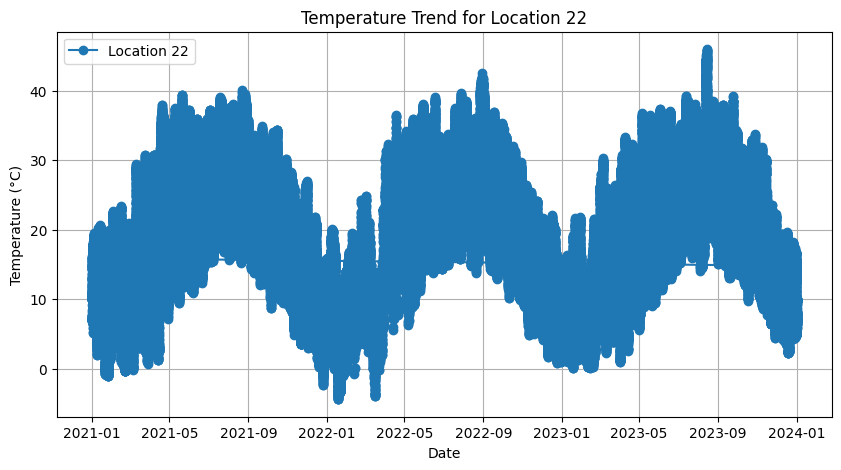

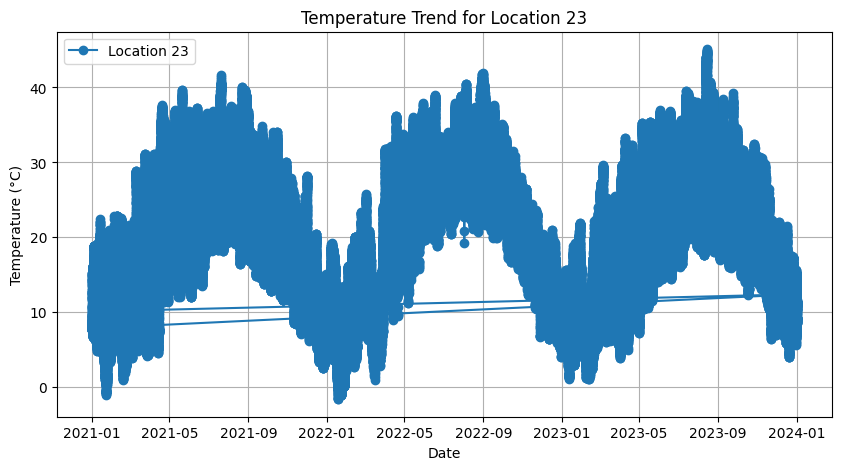

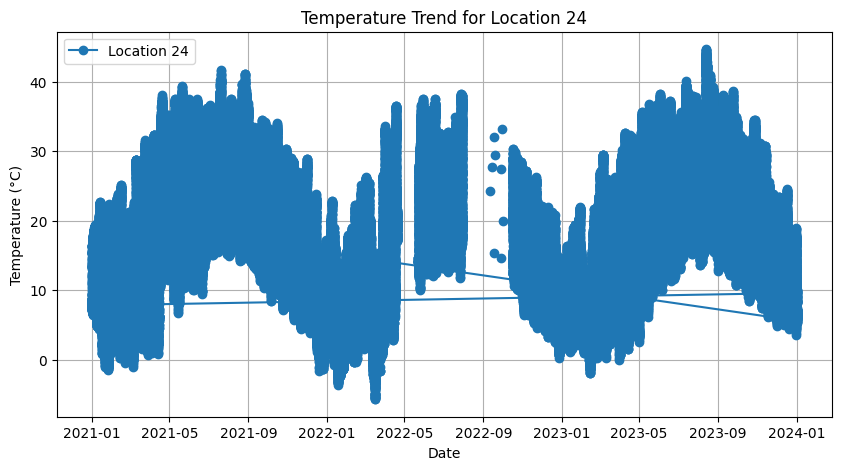

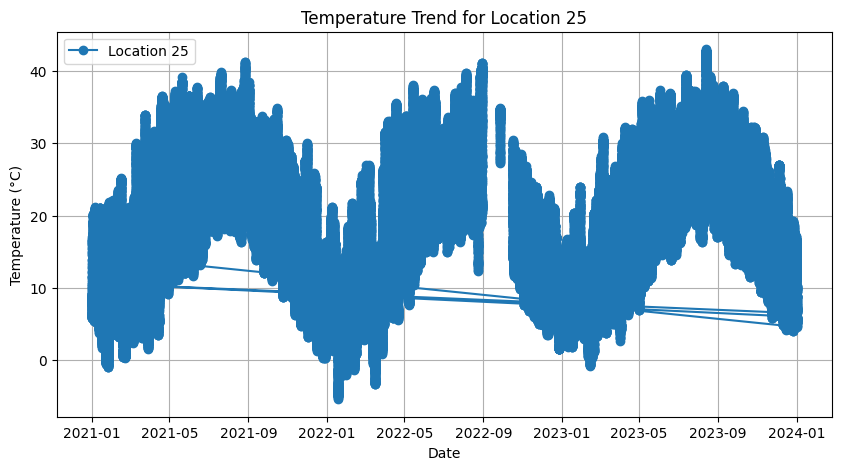

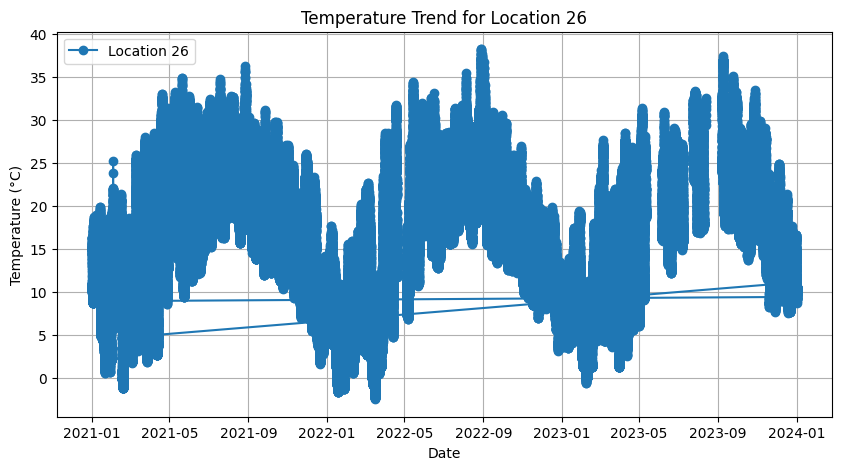

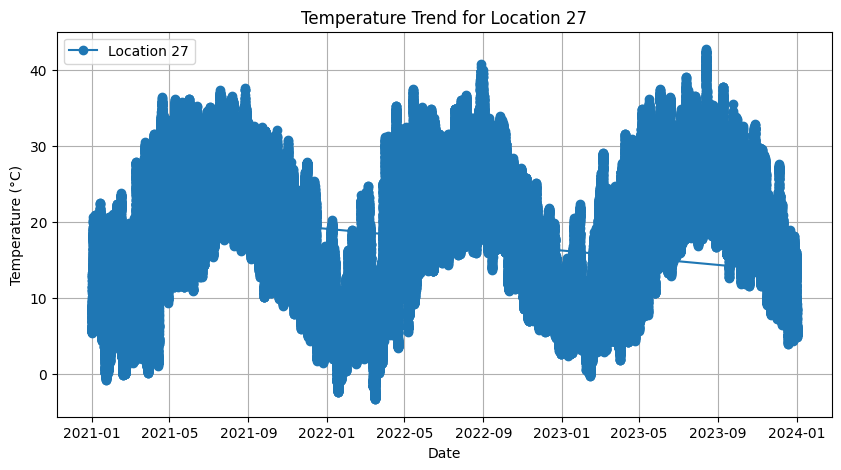

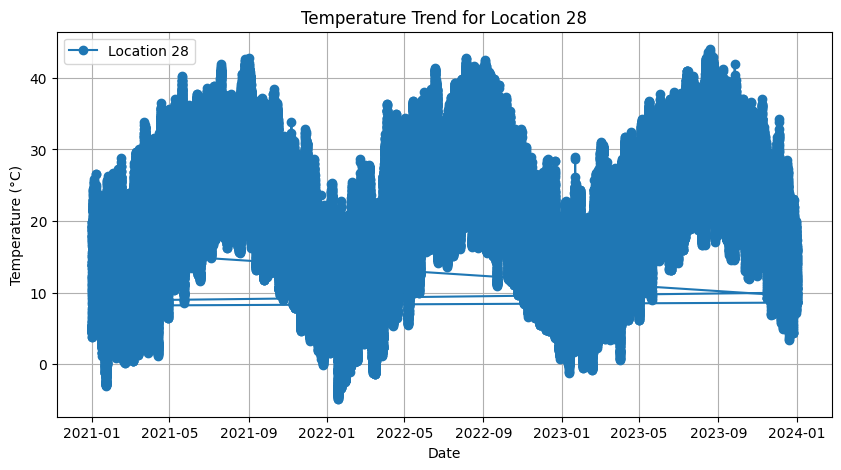

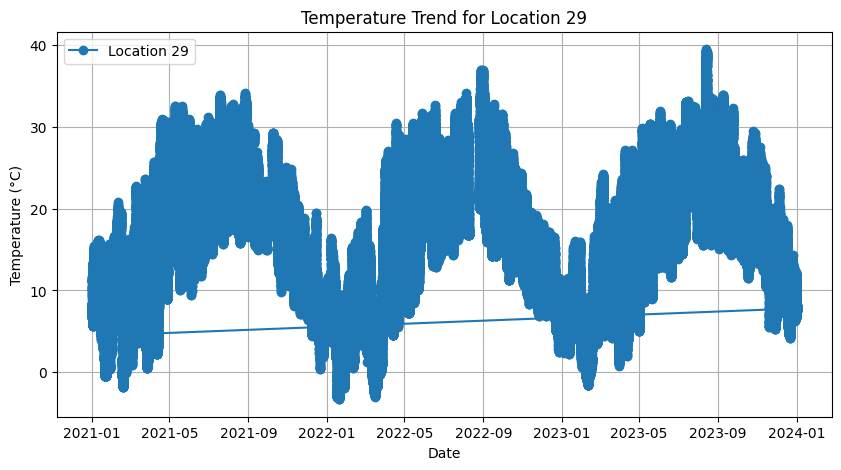

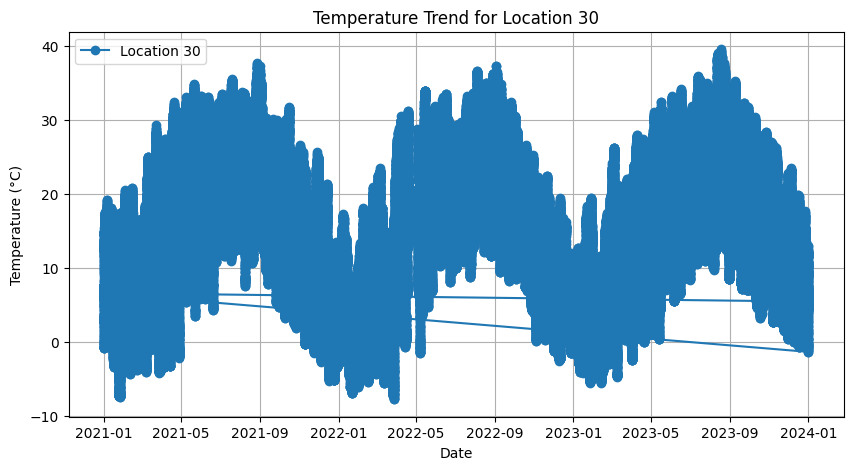

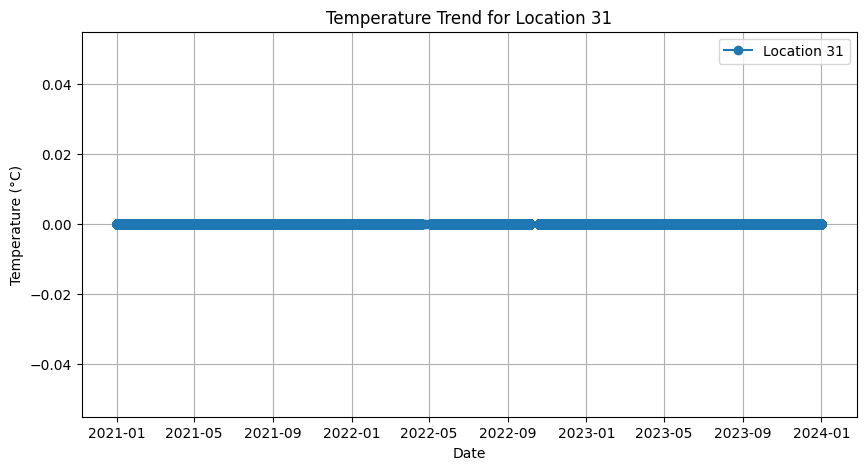

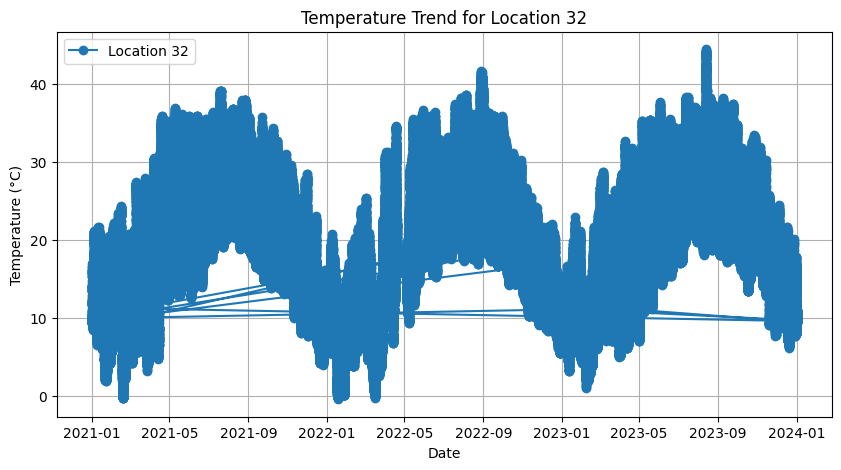

In [13]:
import matplotlib.pyplot as plt

# Group the weather data by 'id'
weather_grouped = weather_df.groupby('id')

# Loop through each group and plot the temperature trend
for id, group in weather_grouped:
    plt.figure(figsize=(10, 5))
    plt.plot(group['date_time'], group['air_temperature_c'], marker='o', label=f'Location {id}')
    plt.title(f'Temperature Trend for Location {id}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.show()

# To focus on a specific location, uncomment and set the desired location_id
# location_id = 2  # Change this to the desired location ID
# loc_df = weather_df[weather_df['id'] == location_id]
# plt.figure(figsize=(10, 5))
# plt.plot(loc_df['date_time'], loc_df['air_temperature_c'], label=f'Location {location_id}')
# plt.title(f'Temperature Trend for Location {location_id}')
# plt.xlabel('Date')
# plt.ylabel('Temperature (°C)')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()



## Finding nearest weather station to power station by coords

In [15]:
# Drop columns with 2 or 3 unique values
columns_to_drop = [col for col in combined_consumption_df.columns if combined_consumption_df[col].nunique() <= 3]
combined_consumption_df = combined_consumption_df.drop(columns=columns_to_drop)

# Display the remaining columns
print("Remaining columns after dropping columns with 2 or 3 unique values:")
print(combined_consumption_df.columns)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
print(combined_consumption_df.columns)


In [ ]:

import matplotlib.pyplot as plt


# Plotting a histogram for a specific numeric column (replace 'your_numeric_column' with the actual column name)
plt.figure(figsize=(10, 6))
plt.hist(combined_consumption_df['ABDOON_P'], bins=30, color='blue', edgecolor='black')  # Change 'your_numeric_column' to the actual column name
plt.title('Histogram of ABDOON_P Consumption Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced visualizations

# Drop any columns that are completely empty (i.e., all values are NaN)
combined_consumption_df = combined_consumption_df.dropna(axis=1, how='all')

# List of columns to create histograms for
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'N_KARAK P', 'QATRANA P', 'QUWEIRA P', 'Q_CEMENT P', 'RAJIHI P',
    'RAMA P', 'RASHADI_P', 'REHAB P', 'RESHA_N P', 'REWESHED P',
    'SABHA P', 'SAFAWI P', 'SAHAB P', 'SHEDIA_P', 'SUBEIHI P',
    'SWEIMEH P', 'TAFILA_C P', 'TAREQ P', 'UNIVRSTY P', 'WAQAS P',
    'ABDALI_P', 'AMMANS_P', 'AQABA A2_P', 'AQABA_TH_P', 'BAYADER_P',
    'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Set the number of rows and columns for subplots
n_cols = 3  # Number of columns for the subplot
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot histograms for each specified column in separate subplots
for i, column in enumerate(columns_to_plot):
    if column in combined_consumption_df.columns:  # Check if the column exists in DataFrame
        axes[i].hist(combined_consumption_df[column], bins=30, alpha=0.7)
        axes[i].set_title(column)
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')
        axes[i].grid()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

# Drop empty columns
combined_consumption_df = combined_consumption_df.dropna(axis=1, how='all')

# List of columns to create box plots for
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'N_KARAK P', 'QATRANA P', 'QUWEIRA P', 'Q_CEMENT P', 'RAJIHI P',
    'RAMA P', 'RASHADI_P', 'REHAB P', 'RESHA_N P', 'REWESHED P',
    'SABHA P', 'SAFAWI P', 'SAHAB P', 'SHEDIA_P', 'SUBEIHI P',
    'SWEIMEH P', 'TAFILA_C P', 'TAREQ P', 'UNIVRSTY P', 'WAQAS P',
    'ABDALI_P', 'AMMANS_P', 'AQABA A2_P', 'AQABA_TH_P', 'BAYADER_P',
    'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Set the number of rows and columns for subplots
n_cols = 3  # Number of columns for the subplot
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a more refined plot style using seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Define a color palette for the boxplots
palette = sns.color_palette("Set2", n_colors=len(columns_to_plot))

# Plot box plots for each specified column in separate subplots
for i, column in enumerate(columns_to_plot):
    if column in combined_consumption_df.columns:  # Check if the column exists in DataFrame
        sns.boxplot(data=combined_consumption_df[column], ax=axes[i], color=palette[i])
        axes[i].set_title(column, fontsize=10, weight='bold')
        axes[i].set_ylabel('Values', fontsize=8)
        axes[i].tick_params(axis='x', labelsize=7)
        axes[i].tick_params(axis='y', labelsize=7)
        axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and improve aesthetics
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the columns to analyze
columns_to_analyze = ['BROADCA_P', 'MWQAR P', 'M_CEMENT P', 'Q_CEMENT P','SHEDIA_P']

# Create histograms plots to analyze some columns with problems
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_analyze):
    plt.subplot(1, 5, i + 1)
    sns.histplot(combined_consumption_df[column], kde=True, color='blue', bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# Create box plots to analyze some columns with problems
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_analyze):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(x=combined_consumption_df[column], color='orange')
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Values')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced visualizations


# Drop any columns that are completely empty (i.e., all values are NaN)
combined_consumption_df = combined_consumption_df.dropna(axis=1, how='all')

# Define the columns to analyze
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'N_KARAK P', 'QATRANA P', 'QUWEIRA P', 'Q_CEMENT P', 'RAJIHI P',
    'RAMA P', 'RASHADI_P', 'REHAB P', 'RESHA_N P', 'REWESHED P',
    'SABHA P', 'SAFAWI P', 'SAHAB P', 'SHEDIA_P', 'SUBEIHI P',
    'SWEIMEH P', 'TAFILA_C P', 'TAREQ P', 'UNIVRSTY P', 'WAQAS P',
    'ABDALI_P', 'AMMANS_P', 'AQABA A2_P', 'AQABA_TH_P', 'BAYADER_P',
    'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Filter the DataFrame to keep only those columns with values greater than 120
filtered_df = combined_consumption_df[columns_to_plot].where(combined_consumption_df[columns_to_plot] > 160)

# Drop columns that have all NaN values after filtering
filtered_df = filtered_df.dropna(axis=1, how='all')

# Create a figure for the plots, setting the overall size
plt.figure(figsize=(15, 10))

# Create a box plot for all filtered columns in the first subplot
plt.subplot(2, 1, 1)  # Create a subplot with 2 rows and 1 column, focus on the first one
sns.boxplot(data=filtered_df, palette="Set3")  # Draw a box plot with a color palette
plt.title('Box Plot of Values Greater Than 160')  # Title for the box plot
plt.ylabel('Values')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Calculate the mean values for the filtered DataFrame
mean_values = filtered_df.mean()

# Create a bar plot for the mean values of the filtered columns in the second subplot
plt.subplot(2, 1, 2)  # Focus on the second subplot
mean_values.plot(kind='bar', color='lightblue')  # Draw a bar plot for mean values with a specified color
plt.title('Mean of Values Greater Than 160')  # Title for the bar plot
plt.ylabel('Mean Value')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap and improve appearance
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop any columns that are completely empty
combined_consumption_df = combined_consumption_df.dropna(axis=1, how='all')


# Define the columns to analyze
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'RASHADI_P', 'SHEDIA_P', 'ABDALI_P', 'AMMANS_P', 'AQABA_TH_P',
    'BAYADER_P', 'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Filter the DataFrame to keep only those columns that exist
existing_columns = [col for col in columns_to_plot if col in combined_consumption_df.columns]

# Create a new DataFrame to hold values between 0 and 10
filtered_df = combined_consumption_df[existing_columns].copy()

# Keep only values that are between 0 and 10 (inclusive)
filtered_df = filtered_df[(filtered_df >= 0) & (filtered_df <= 10)]

# Create a figure for the box plot
plt.figure(figsize=(18, 12))  # Increase figure size

# Create a box plot for all existing columns
sns.boxplot(data=filtered_df, palette="Set3")

# Title and labels
plt.title('Box Plot of values less than 10)', fontsize=16)
plt.ylabel('Values', fontsize=14)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop any columns that are completely empty
combined_consumption_df = combined_consumption_df.dropna(axis=1, how='all')

# Define the columns to analyze
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'RASHADI_P', 'SHEDIA_P', 'ABDALI_P', 'AMMANS_P', 'AQABA_TH_P',
    'BAYADER_P', 'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Filter the DataFrame to keep only the columns that exist in the dataset
existing_columns = [col for col in columns_to_plot if col in combined_consumption_df.columns]

# Create a new DataFrame with only the selected columns
filtered_df = combined_consumption_df[existing_columns].copy()

# Keep only values that are between 0 and 10
filtered_df = filtered_df[(filtered_df >= 0) & (filtered_df <= 10)]

# Create a figure for the box plot
plt.figure(figsize=(18, 12))  # Increase figure size for better visibility

# Create a box plot for all selected columns
sns.boxplot(data=filtered_df, palette="Set3")

# Set title and labels
plt.title('Box Plot of Selected Columns (Values between 0 and 10)', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and reduce font size

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop completely empty columns
combined_consumption_df = combined_consumption_df.dropna(axis=1, how='all')

# Select only numerical columns (assuming consumption values are numeric)
numeric_columns = combined_consumption_df.select_dtypes(include=['number']).columns

# Flatten all values from selected columns into one list (ignoring NaN values)
all_values = combined_consumption_df[numeric_columns].values.flatten()
all_values = all_values[~pd.isna(all_values)]  # Remove NaNs

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(all_values, bins=50, kde=True, color='royalblue')

# Set titles and labels
plt.title("Overall Consumption Distribution", fontsize=16)
plt.xlabel("Consumption Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()


In [ ]:
  import numpy as np
import pandas as pd

# Update with the correct datetime column name
datetime_column_name = 'date time'  # Replace with the actual name
combined_consumption_df.set_index(datetime_column_name, inplace=True)

# Ensure the consumption column is numeric
consumption_column_name = 'ABDOON_P'  # Update this with the correct name
combined_consumption_df[consumption_column_name] = pd.to_numeric(combined_consumption_df[consumption_column_name], errors='coerce')

# Remove any rows with NaN values in the consumption column
combined_consumption_df.dropna(subset=[consumption_column_name], inplace=True)

# Parameters for additional simulated data
np.random.seed(42)
n_days = 365 * 2  # 2 years of data
n_intervals_per_day = 96  # 15-min intervals
n_samples = n_days * n_intervals_per_day

# Generate a datetime index for the additional data

date_rng = pd.date_range(start="2023-01-01", periods=n_samples, freq="15min")  # Change 'T' to 'min'

# Simulate daily and weekly patterns
daily_pattern = np.sin(2 * np.pi * (np.arange(n_intervals_per_day) / n_intervals_per_day)) * 20 + 50
weekly_pattern = (np.cos(2 * np.pi * (date_rng.dayofweek / 7)) * 10 + 40)

# Add noise and holiday effects
noise = np.random.normal(0, 2, n_samples)
holidays = np.random.choice([0, 20], size=n_samples, p=[0.95, 0.05])

# Repeat daily pattern for all days
daily_pattern_repeated = np.tile(daily_pattern, n_days)

# Simulate power consumption
power_consumption = (daily_pattern_repeated +
                     weekly_pattern[:n_samples] +
                     noise + holidays)

# Create a DataFrame for simulated data
simulated_data = pd.DataFrame({
    'datetime': date_rng,
    'power_consumption': power_consumption
})

# Combine with actual consumption data
combined_data = pd.concat([combined_consumption_df[[consumption_column_name]], simulated_data.set_index('datetime')])

# Add time-based features to the combined DataFrame
combined_data['hour'] = combined_data.index.hour
combined_data['day_of_week'] = combined_data.index.dayofweek
combined_data['is_weekend'] = combined_data['day_of_week'].isin([5, 6]).astype(int)

# Assuming you have specific holidays to add (replace with actual holiday dates)
holidays = pd.to_datetime(['2022-12-25', '2023-01-01', '2023-04-15'])  # Example holiday dates
combined_data['is_holiday'] = combined_data.index.isin(holidays).astype(int)

# Display the first few rows of the combined DataFrame
# Keep only the specified columns
combined_data = combined_data[['power_consumption', 'hour', 'day_of_week', 'is_weekend', 'is_holiday']]

# Display the first few rows of the updated combined_data
print(combined_data['power_consumption'].head())



In [ ]:
import pandas as pd
import numpy as np


# Set datetime as the index
combined_consumption_df.set_index('date time', inplace=True)

# Ensure the consumption column is numeric
consumption_column_name = 'ABDOON_P'  # Update this with the correct name
combined_consumption_df[consumption_column_name] = pd.to_numeric(combined_consumption_df[consumption_column_name], errors='coerce')

# Remove any rows with NaN values in the consumption column
combined_consumption_df.dropna(subset=[consumption_column_name], inplace=True)

# Create a DataFrame with your actual consumption data
data = combined_consumption_df[[consumption_column_name]].copy()

# Add time-based features
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
#friday and saturday
data['is_weekend'] = data['day_of_week'].isin([4, 5]).astype(int)

# You can add holiday effects here if needed
# For example, you could define specific dates as holidays
# holidays = ['2023-01-01', '2023-12-25']  # Add your holiday dates here
# data['is_holiday'] = data.index.normalize().isin(pd.to_datetime(holidays)).astype(int)

# Display the first few rows of the DataFrame
print(data.head())
# Find the first holiday
# Filter for the specific date (December 23, 2022)
specific_date_data = data.loc['2022-12-23']

# Display the raw data for December 23, 2022
print("Raw data for December 23, 2022:")
print(specific_date_data)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot


# Set datetime as the index
combined_consumption_df.set_index('date time', inplace=True)

# Ensure the consumption column is numeric (replace 'your_consumption_column' with the actual column name)
# Check for the actual column names to replace correctly
consumption_column_name = 'ABDOON_P'  # Update this with the correct name
combined_consumption_df[consumption_column_name] = pd.to_numeric(combined_consumption_df[consumption_column_name], errors='coerce')

# Remove any rows with NaN values in the consumption column
combined_consumption_df.dropna(subset=[consumption_column_name], inplace=True)

# Resample data to daily frequency and sum consumption
daily_consumption = combined_consumption_df.resample('D')[consumption_column_name].sum()

# Plot daily consumption
plt.figure(figsize=(14, 7))
plt.plot(daily_consumption.index, daily_consumption, label='Daily Consumption')
plt.title('Daily Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.grid()
plt.show()

# Time series decomposition
decomposition = seasonal_decompose(daily_consumption, model='additive')
decomposition.plot()
plt.show()

# Autocorrelation plot
autocorrelation_plot(daily_consumption)
plt.title('Autocorrelation of Daily Consumption')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Ensure the consumption column is numeric
consumption_column_name = 'ABDOON_P'  # Update this with the correct name
combined_consumption_df[consumption_column_name] = pd.to_numeric(combined_consumption_df[consumption_column_name], errors='coerce')

# Remove any rows with NaN values in the consumption column
combined_consumption_df.dropna(subset=[consumption_column_name], inplace=True)

# Resample data to daily frequency and sum consumption
daily_consumption = combined_consumption_df.resample('D')[consumption_column_name].sum()

# ACF and PACF plots
plot_acf(daily_consumption)
plt.title('ACF of Daily Consumption')
plt.show()

plot_pacf(daily_consumption)
plt.title('PACF of Daily Consumption')
plt.show()

# Set the parameters p, d, q based on ACF and PACF analysis
p = 1  # replace with your chosen value
d = 1  # replace with your chosen value
q = 1  # replace with your chosen value

# Fit the ARIMA model
model = ARIMA(daily_consumption, order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=daily_consumption.index[-1] + pd.Timedelta(days=1), periods=30)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the forecast along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(daily_consumption, label='Historical Consumption')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Daily Energy Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_consumption)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


In [ ]:
import pmdarima
print(pmdarima.__version__)

In [ ]:
from pmdarima import auto_arima

model = auto_arima(daily_consumption, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())


In [ ]:
import pandas as pd
from pmdarima import auto_arima


combined_consumption_df.set_index('date time', inplace=True)

consumption_column_name = 'ABDOON_P'  

combined_consumption_df[consumption_column_name] = pd.to_numeric(combined_consumption_df[consumption_column_name], errors='coerce')
combined_consumption_df.dropna(subset=[consumption_column_name], inplace=True)
daily_consumption = combined_consumption_df.resample('D')[consumption_column_name].sum()

# Automatically fit an ARIMA model
model = auto_arima(daily_consumption, seasonal=False, stepwise=True, suppress_warnings=True)

# Print the summary of the model
print(model.summary())


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data
train_size = int(len(daily_consumption) * 0.8)
train, test = daily_consumption[:train_size], daily_consumption[train_size:]

# Fit the model on training data
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Make predictions on the test set
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error: {rmse}')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'daily_consumption' is already defined and the SARIMAX model has been fitted

# Set the parameters for the forecast
n_days = 7
n_intervals_per_day = 96  # 24 hours * 4 (15-minute intervals)
total_intervals = n_days * n_intervals_per_day

# Generate future time index for the next 7 days with 15-minute frequency
last_date = daily_consumption.index[-1]  # Get the last date from historical data
future_index = pd.date_range(start=last_date + pd.Timedelta(minutes=15), periods=total_intervals, freq='15min')  # Updated 'T' to 'min'

# Forecast the future values
forecast = model_fit.get_forecast(steps=total_intervals)
forecast_values = forecast.predicted_mean  # Predicted mean values

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame(forecast_values, index=future_index, columns=['Forecast'])

# Display the forecast DataFrame
print(forecast_df)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(daily_consumption, label='Historical Consumption', color='blue')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('15-Minute Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.grid()
plt.show()


# Combined Dataset EDA